
### **DMDW Lab Assignment - 03**

---



**Aim :** To perform data cleaning and preparing for operations



**Name :** Kiran Patil

**ID :** 211070904



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv("netflix1.csv")

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.shape

(8790, 10)

<Axes: >

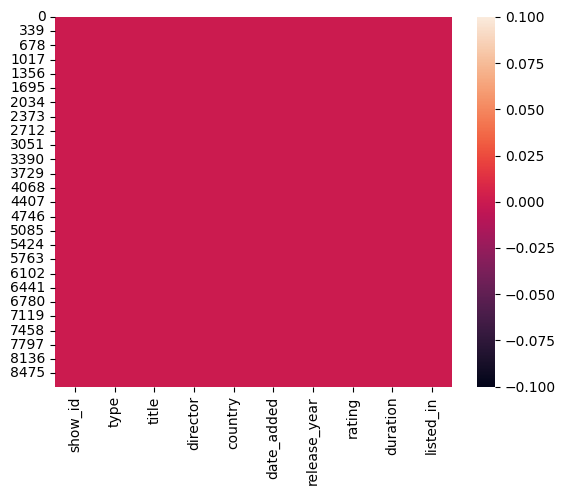

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [ ]:
df.duplicated(["type","title","release_year"]).sum()

3

In [ ]:
duplicate_rows = df[df.duplicated(["type","title","release_year"], keep = False)]


In [ ]:
duplicate_rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,s3997,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [ ]:
rows_to_keep = duplicate_rows[["type","title","release_year"]].duplicated(keep='first')
rows_to_keep

393     False
537      True
2925    False
3285    False
4260     True
4261     True
dtype: bool

In [ ]:
indexes_to_drop = duplicate_rows[~rows_to_keep].index
indexes_to_drop

Int64Index([393, 2925, 3285], dtype='int64')

In [ ]:
df = df.drop(indexes_to_drop)

In [ ]:
duplicate_rows = df[df.duplicated(["type","title","release_year"], keep = False)]
duplicate_rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [ ]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [ ]:
country_type_counts = df.groupby(['country', 'type']).size().unstack()
country_type_counts

type,Movie,TV Show
country,,
Argentina,56.0,20.0
Australia,61.0,53.0
Austria,8.0,1.0
Bangladesh,3.0,NaN
Belarus,NaN,1.0
...,...,...
Uruguay,8.0,1.0
Venezuela,2.0,NaN
Vietnam,7.0,NaN


In [ ]:
top_10_countries = country_type_counts.sum(axis=1).nlargest(10).index
top_10_countries

Index(['United States', 'India', 'United Kingdom', 'Pakistan', 'Not Given',
       'Canada', 'Japan', 'South Korea', 'France', 'Spain'],
      dtype='object', name='country')

In [ ]:
country_type_counts_top_10 = country_type_counts.loc[top_10_countries]
country_type_counts_top_10

type,Movie,TV Show
country,,
United States,2395.0,845.0
India,975.0,81.0
United Kingdom,387.0,251.0
Pakistan,71.0,349.0
Not Given,257.0,30.0
Canada,187.0,84.0
Japan,87.0,172.0
South Korea,49.0,165.0
France,148.0,65.0


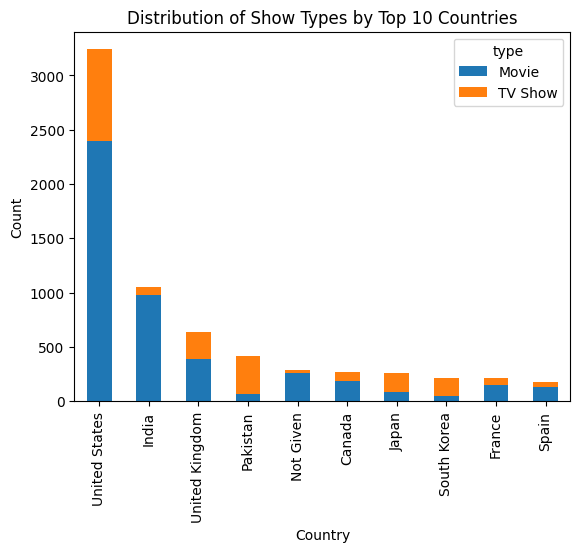

In [ ]:
country_type_counts_top_10.plot(kind='bar', stacked=True)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Show Types by Top 10 Countries')

plt.show()

In [ ]:
movie_counts = df[df['type'] == 'Movie']['release_year'].value_counts().sort_index()
movie_counts

1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    765
2018    766
2019    632
2020    517
2021    277
Name: release_year, Length: 73, dtype: int64

In [ ]:
tv_show_counts = df[df['type'] == 'TV Show']['release_year'].value_counts().sort_index()
tv_show_counts

1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003      8
2004      9
2005     13
2006     14
2007     14
2008     22
2009     34
2010     39
2011     40
2012     63
2013     61
2014     88
2015    159
2016    243
2017    265
2018    378
2019    397
2020    436
2021    315
Name: release_year, dtype: int64

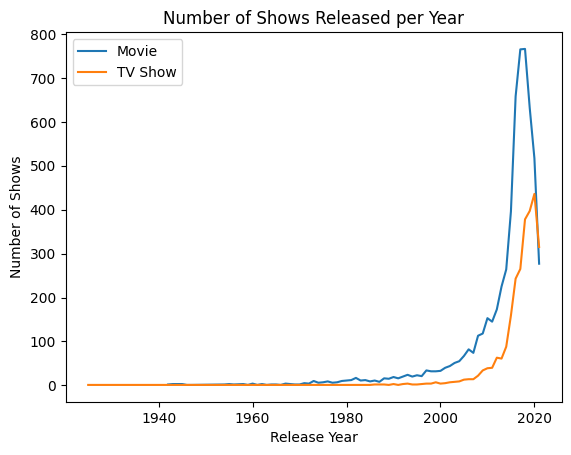

In [ ]:
plt.plot(movie_counts.index, movie_counts.values, label='Movie')
plt.plot(tv_show_counts.index, tv_show_counts.values, label='TV Show')

plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released per Year')
plt.legend()

plt.show()

In [ ]:
genre_type_counts = df.groupby(['listed_in', 'type']).size().unstack()
genre_type_counts

type,Movie,TV Show
listed_in,,
Action & Adventure,128.0,NaN
"Action & Adventure, Anime Features",1.0,NaN
"Action & Adventure, Anime Features, Children & Family Movies",4.0,NaN
"Action & Adventure, Anime Features, Classic Movies",2.0,NaN
"Action & Adventure, Anime Features, Horror Movies",1.0,NaN
...,...,...
"TV Horror, TV Mysteries, Teen TV Shows",NaN,1.0
"TV Horror, Teen TV Shows",NaN,2.0
"TV Sci-Fi & Fantasy, TV Thrillers",NaN,1.0


In [ ]:
top_10_genre = genre_type_counts.sum(axis=1).nlargest(10).index
top_10_genre

Index(['Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', 'Kids' TV',
       'Children & Family Movies', 'Children & Family Movies, Comedies',
       'Documentaries, International Movies',
       'Dramas, International Movies, Romantic Movies'],
      dtype='object', name='listed_in')

In [ ]:
genre_type_counts_top_10 = genre_type_counts.loc[top_10_genre]
genre_type_counts_top_10

type,Movie,TV Show
listed_in,,
"Dramas, International Movies",362.0,NaN
Documentaries,359.0,NaN
Stand-Up Comedy,334.0,NaN
"Comedies, Dramas, International Movies",274.0,NaN
"Dramas, Independent Movies, International Movies",252.0,NaN
Kids' TV,NaN,219.0
Children & Family Movies,215.0,NaN
"Children & Family Movies, Comedies",201.0,NaN
"Documentaries, International Movies",186.0,NaN


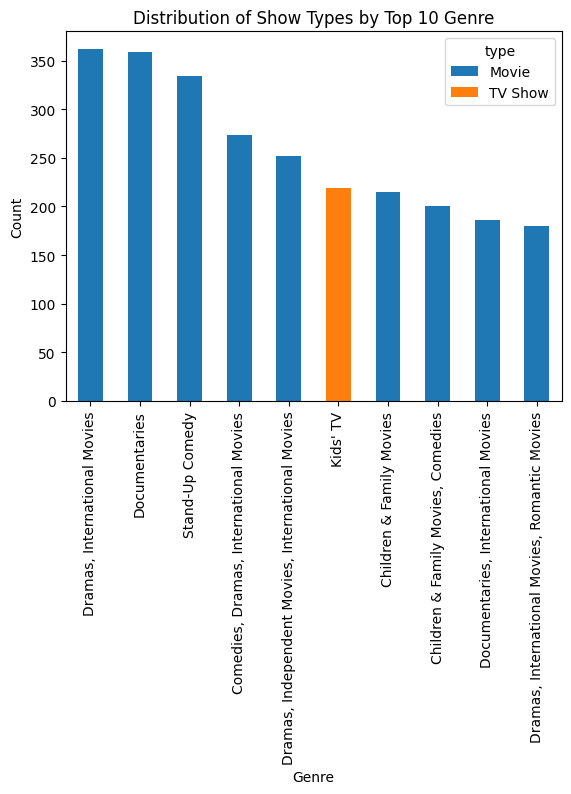

In [ ]:
genre_type_counts_top_10.plot(kind='bar', stacked=True)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Show Types by Top 10 Genre')

plt.show()

In [ ]:
dir_type_counts = df.groupby(['director', 'type']).size().unstack()
dir_type_counts

type,Movie,TV Show
director,,
A. L. Vijay,2.0,NaN
A. Raajdheep,1.0,NaN
A. Salaam,1.0,NaN
A.R. Murugadoss,2.0,NaN
Aadish Keluskar,1.0,NaN
...,...,...
Çagan Irmak,1.0,NaN
Ísold Uggadóttir,1.0,NaN
Óskar Thór Axelsson,1.0,NaN


In [ ]:
top_10_dir = dir_type_counts.sum(axis=1).nlargest(10).index
top_10_dir

Index(['Not Given', 'Rajiv Chilaka', 'Alastair Fothergill',
       'Raúl Campos, Jan Suter', 'Marcus Raboy', 'Suhas Kadav', 'Jay Karas',
       'Cathy Garcia-Molina', 'Jay Chapman', 'Martin Scorsese'],
      dtype='object', name='director')

In [ ]:
dir_type_counts_top_10 = dir_type_counts.loc[top_10_dir]
dir_type_counts_top_10

type,Movie,TV Show
director,,
Not Given,173.0,2414.0
Rajiv Chilaka,19.0,1.0
Alastair Fothergill,4.0,14.0
"Raúl Campos, Jan Suter",18.0,NaN
Marcus Raboy,15.0,1.0
Suhas Kadav,16.0,NaN
Jay Karas,14.0,NaN
Cathy Garcia-Molina,13.0,NaN
Jay Chapman,12.0,NaN


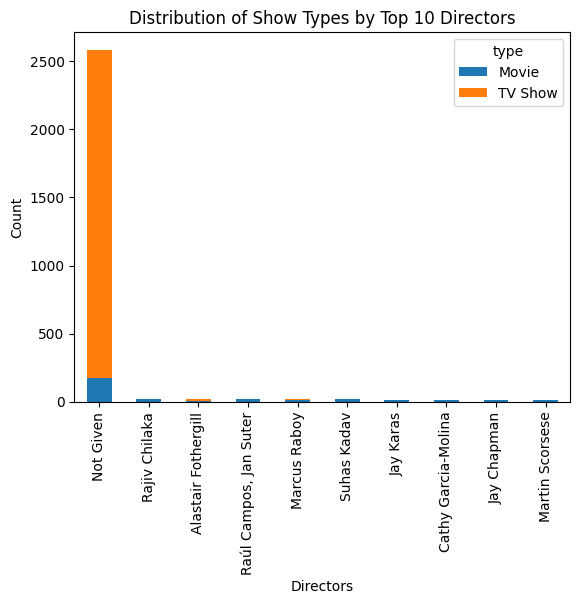

In [ ]:
  dir_type_counts_top_10.plot(kind='bar', stacked=True)

plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Distribution of Show Types by Top 10 Directors')

plt.show()

In [ ]:
rating_counts = df['rating'].value_counts()
rating_counts

TV-MA       3205
TV-14       2155
TV-PG        861
R            798
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

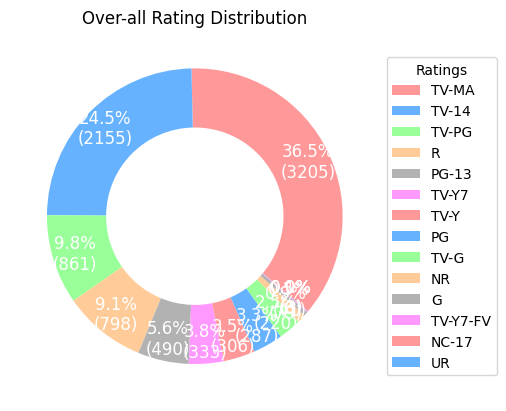

In [ ]:
fig, ax = plt.subplots()

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#B2B2B2', '#FF99FF']
wedges, text, autotexts = ax.pie(rating_counts, colors=colors, wedgeprops=dict(width=0.4), startangle=-40,
                                 autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 12})
ax.legend(wedges, rating_counts.index, title='Ratings', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(aspect="equal", title='Over-all Rating Distribution')

label_format = '{:.1f}%\n({})'
for i, autotext in enumerate(autotexts):
    autotext.set_text(label_format.format(rating_counts[i] / sum(rating_counts) * 100, rating_counts[i]))
    autotext.set_color('white')

plt.show()